# Graph Lab

## Header information:

  - Author #1: Luigi Quattrociocchi (quattrl@mcmaster.ca)
  - Author #2: Dennis Fong (fongd1@mcmaster.ca)
  - Gitlab URL: http://gitlab.cas.mcmaster.ca/quattrl/l1-graph-lab
  - Avenue to Learn group name: Graph 42

## Week 1

In [1]:
# Build a graph from the csv files
from graphlib.builders import TubemapCSVBuilder

tubemap_builder = TubemapCSVBuilder()
tubemap_graph = tubemap_builder.build("_dataset/london.stations.csv", "_dataset/london.connections.csv", "_dataset/london.lines.csv")

In [2]:
# Compute some metrics about the graph
from graphlib.metrics import NumberOfNodesMetric, NumberOfEdgesMetric, DegreeMetric

print(f"Number of nodes = {NumberOfNodesMetric(tubemap_graph)()}")
print(f"Number of edges = {NumberOfEdgesMetric(tubemap_graph)()}")

node_degrees = [DegreeMetric(tubemap_graph, x)() for x in tubemap_graph.adj]
avg_degree = sum(node_degrees) / len(node_degrees)
print(f"Average node degree = {avg_degree}")

Number of nodes = 302
Number of edges = 406
Average node degree = 2.6887417218543046


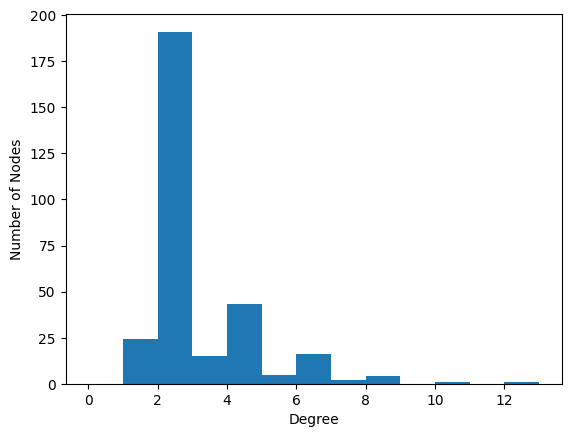

In [3]:
# Draw the distribution of node degrees
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

N = max(node_degrees) + 1
fig, ax = plt.subplots(1, 1)
N, bins, patches = ax.hist(node_degrees, bins=N, range=(0, N))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
_ = plt.xlabel("Degree")
_ = plt.ylabel("Number of Nodes")

In [4]:
# Benchmark
from graphlib.metrics import TubemapItinerary
from graphlib.metrics.paths import EuclidianDistanceShortestPathMetric, DijkstraShortestPathMetric

start_name, end_name = "Hammersmith", "Stratford"
u = tubemap_builder.name_to_id[start_name]
v = tubemap_builder.name_to_id[end_name]

dijkstra = DijkstraShortestPathMetric(tubemap_graph)
astar = EuclidianDistanceShortestPathMetric(tubemap_graph)

itinerary = TubemapItinerary(u, v)

itinerary.set_search_strategy(dijkstra)
p1 = itinerary.shortest_path()

itinerary.set_search_strategy(astar)
p2 = itinerary.shortest_path()

# TODO: Benchmark
assert p1 == p2

# print(dijk._edges_counter, dijk._nodes_counter, dijk._relaxation_counter)
# print(eucl._edges_counter, eucl._nodes_counter, eucl._relaxation_counter)


### TODO
Class diagram ...  
Justify design choices ...  
Present benchmarks ...  
Describe work distribution ...  

## Week 2

## Week 3